# Regresión logística

<img src="img/img_976.png" width="650"/>

<img src="img/img_977.png" width="650"/>

<img src="img/img_978.png" width="650"/>

# Las matemáticas tras la regresión logística, las tablas de contingencia

In [619]:
import pandas as pd
import matplotlib.pyplot as plt

In [620]:
df = pd.read_csv("datasets/gender-purchase/Gender Purchase.csv")
df.head()

,Gender,Purchase
0,Female,Yes
1,Female,Yes
2,Female,No
3,Male,No
4,Male,Yes


In [621]:
df.shape

(511, 2)

# Tabla de contingencia

La tabla de contingencia muestra el total de observaciones que caen dentro de cada categoría o dentro de cada combinación de categorías. Crearemos un objeto de tipo **crosstab**.

In [622]:
contingence_table = pd.crosstab(df["Gender"], df["Purchase"])
contingence_table      # Devuelve un nuevo DataFrame

Purchase,No,Yes
Gender,,
Female,106,159
Male,125,121


Vemos que 106 mujeres compraron el producto y 159 no lo hicieron. Vemos que 125 hombres compraron el producto y 121 no. Ahora vamos a ver cuántos hombres y mujeres entraron en la tienda **para calcular probabilidades**.

In [623]:
contingence_table.sum(axis=1)  # Es decir, sumo las columnas

Gender
Female    265
Male      246
dtype: int64

In [624]:
contingence_table.sum(axis=0)  # Es decir, sumo las filas

Purchase
No     231
Yes    280
dtype: int64

Con esto he calculado las frecuencias absolutas. También **podemos calcular los porcentajes**. Es decir, la proporción de hombre y mujeres que compraron y los que no.

In [625]:
# Primero tenemos que pasar la tabla de contingencia float para poder dividir y obtener porcentajes.
# Luego dividimos cada fila por el total para obtener los porcentajes.
contingence_table.astype("float").div(contingence_table.sum(axis=1), axis=0)

Purchase,No,Yes
Gender,,
Female,0.40000,0.60000
Male,0.50813,0.49187


Tenemos que:

* El 40% de las mujeres no compraron el producto
* El 60% de las mujeres si compraron el producto
* El 50.8% de los hombres no compraron el producto
* El 49.1% de los hombres si compraron el producto

# Probabilidad condicionada

* ¿Cuál es la probabilidad de que un cliente compre el producto **sabiendo que es hombre**?
* ¿Cuál es la probabilidad de que un cliente sea mujer **sabiendo que ha comprado el producto**?

# Cociente de probabilidades

Es el cociente entre los casos de éxito sobre los de fracaso en el suceso estudiado y para cada grupo.

<img src="img/img_979.png" width="650"/>

In [626]:
pm = 121 / 246
pf = 159 / 265
odds_m = pm / (1 - pm) # Es igual que el cociente entre los hombres que compran entre los que no compran 121/125
odds_f = pf / (1 - pf) # Es igual que el cociente entre las mujeres que compran entre las que no compran 159/106
pm, pf, odds_m, odds_f

(0.491869918699187, 0.6, 0.9680000000000002, 1.4999999999999998)

* Si el ratio es superior a 1, es más probable el éxito que el fracaso
* Si el ratio es igual a 1, éxito y fracaso son equiprobables
* Si el ratio es menor que 1, es más probable el fracaso que el éxito.

El ratio puede ser desde 0 hasta +infinito.

Si dividimos los dos ratios, veremos cuál de los grupos tiene más probabilidad de éxito.

# De la regresión lineal a la logística

* La predicción **y** estará basada en una probabilidad [0, 1]
* P = a + b * X
* P será la probabilidad de éxito o de fracaso condicionada a la presencia de la variable predictora X

Pero como X puede variar de -infinito a +infinito ... **¿cómo hacemos para acotar P a un valor entre 0 y 1?**. Pues es claro, con la función **sigmoide**.

# Regresión logística múltiple

Exactamente igual.

<img src="img/img_980.png" width="250"/>

El método para ajustar los parámetros se basa en el **método de máxima verosimilitud**.

# Ejemplo de regresión logística para predicciones bancarias

In [627]:
data = pd.read_csv("datasets/bank/bank.csv", sep=";")
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [628]:
data.shape

(4119, 21)

In [629]:
data.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

## Data cleaning

In [630]:
# La variable predictora 'y' tiene como valores yes y no. Los pasamos a 0 y 1 de la siguiente forma
data["y"] = (data["y"]=="yes").astype(int)

In [631]:
# Categoría de la educación. Veamos los valores que tiene
data["education"].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [632]:
# Hagamos una reestructuración de las categorías
import numpy as np

In [633]:
# Agrupamos en una única categoría la educación básica
data["education"] = np.where(data["education"]=="basic.4y", "Basic", data["education"])
data["education"] = np.where(data["education"]=="basic.6y", "Basic", data["education"])
data["education"] = np.where(data["education"]=="basic.9y", "Basic", data["education"])
data["education"].unique()

array(['Basic', 'high.school', 'university.degree', 'professional.course',
       'unknown', 'illiterate'], dtype=object)

In [634]:
# Renombramos los otros valores de las categorías
data["education"] = np.where(data["education"]=="high.school", "High School", data["education"])
data["education"] = np.where(data["education"]=="professional.course", "Professional Course", data["education"])
data["education"] = np.where(data["education"]=="university.degree", "University Degree", data["education"])
data["education"] = np.where(data["education"]=="illiterate", "Illiterate", data["education"])
data["education"] = np.where(data["education"]=="unknown", "Unknown", data["education"])
data["education"].unique()

array(['Basic', 'High School', 'University Degree', 'Professional Course',
       'Unknown', 'Illiterate'], dtype=object)

## Análisis exploratorio

In [635]:
# Cuántos valores tenemos que cada categoría/label de salida
data["y"].value_counts()

0    3668
1     451
Name: y, dtype: int64

In [636]:
# Obtención de la media de cada categoría (solo valores numéricos) agrupados por label
data.groupby("y").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
0,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
1,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


In [637]:
# Obtención de la media de cada categoría (solo valores numéricos) agrupados por educación
data.groupby("education").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
education,,,,,,,,,,,
Basic,42.337124,253.898457,2.429732,978.815597,0.149472,0.237368,93.658600,-41.120552,3.775701,5174.133144,0.079610
High School,38.097720,258.534202,2.630836,958.022801,0.206298,-0.002497,93.564314,-40.995765,3.511732,5163.212595,0.105320
Illiterate,42.000000,146.000000,4.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.834000,5076.200000,0.000000
Professional Course,40.207477,278.816822,2.512150,958.211215,0.194393,0.163925,93.599630,-40.127664,3.701426,5167.595140,0.121495
University Degree,39.017405,247.707278,2.583070,947.900316,0.207278,-0.009731,93.499109,-39.830063,3.547132,5163.023180,0.130538
Unknown,42.826347,267.281437,2.538922,939.700599,0.263473,-0.074251,93.637455,-39.487425,3.410174,5151.260479,0.155689


In [638]:
# Veamos el resultado de la variable "y" analizando únicamente los datos del nivel de estudios
pd.crosstab(data["education"], data["y"])

y,0,1
education,,
Basic,1133,98
High School,824,97
Illiterate,1,0
Professional Course,470,65
University Degree,1099,165
Unknown,141,26


Text(0, 0.5, 'Frecuencia de compra del producto')

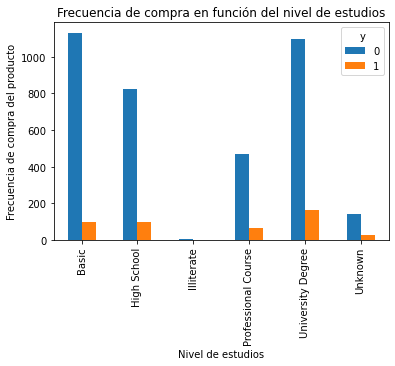

In [639]:
# Representación gráfica
pd.crosstab(data["education"], data["y"]).plot(kind="bar")
plt.title("Frecuencia de compra en función del nivel de estudios")
plt.xlabel("Nivel de estudios")
plt.ylabel("Frecuencia de compra del producto")

Con este gráfico podríamos inferir que los usuarios con mayor nivel de estudios son los que con más frecuencia compran el producto. Podríamos estudiar también cómo influye el estado civil en las compras. En este caso vamos a hacerlo con las barras apiladas (stacked) y vamos a representar las proporciones en lugar de los valores absolutos. Así será más fácil comparar.

In [640]:
table = pd.crosstab(data["marital"], data["y"])
table

y,0,1
marital,,
divorced,403,43
married,2257,252
single,998,155
unknown,10,1


In [641]:
# Calculemos ahora el porcentaje
table.div(table.sum(axis=1), axis=0)

y,0,1
marital,,
divorced,0.903587,0.096413
married,0.899562,0.100438
single,0.865568,0.134432
unknown,0.909091,0.090909


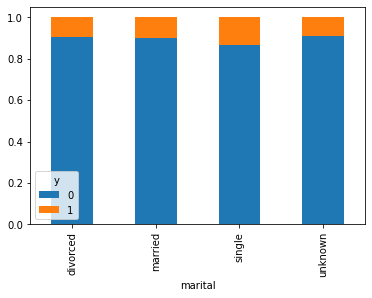

In [642]:
# Representación gráfica
table.div(table.sum(axis=1), axis=0).plot(kind="bar", stacked=True)

Con esto podríamos concluir que el estado civil no es algo que influya mucho a la hora de realizar compras. Igual podríamos el estudio por días de la semana o por el mes. **Hagamos el del mes y estudiemos el resultado**.

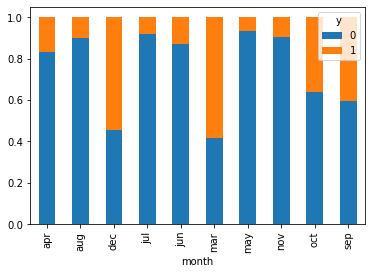

In [643]:
table = pd.crosstab(data["month"], data["y"])
table.div(table.sum(axis=1), axis=0).plot(kind="bar", stacked=True)

Parece que el mes es significativo. Pero puede ser también porque haya menos datos que el resto. Para esto, convendría hacer también el gráfico con stacked = False y utilizando las frecuencias absolutas.

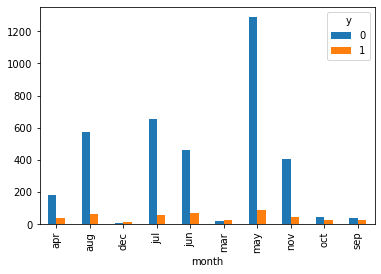

In [644]:
table.plot(kind="bar")

Bueno, parece ser que cuando más se ofrecen los productos (y donde más rechazos hay también) es en los meses de verano.

Estudiemos ahora la edad.

(array([  98.,  821., 1187.,  804.,  616.,  483.,   61.,   22.,   18.,
           9.]),
 array([18., 25., 32., 39., 46., 53., 60., 67., 74., 81., 88.]),
 <a list of 10 Patch objects>)

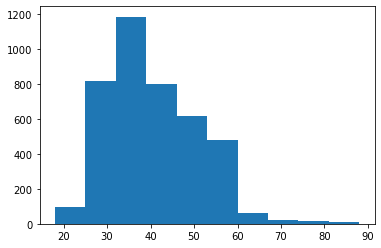

In [645]:
# Veamos primero el histograma de frecuencias y veamos cómo se distribuye la población
plt.hist(data["age"])

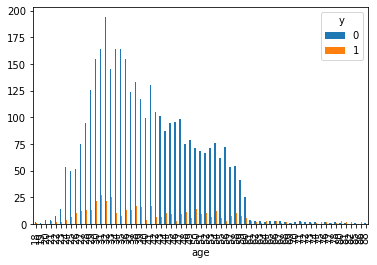

In [646]:
# Y representemos ahora el gráfico de barras de las crosstab
pd.crosstab(data["age"], data["y"]).plot(kind="bar")

# Selección de variables para el modelo logístico

## Conversión de variables categóricas a variables dummy.

In [647]:
# Las variables categóricas son las siguientes
categories = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome"]
for category in categories:
    cat_list = "cat_" + category
    cat_dummies = pd.get_dummies(data[category], prefix=cat_list)
    data = pd.concat([data, cat_dummies], axis=1)

In [648]:
# También podríamos haber obtenido las variables categóricas del siguiente modo
data.select_dtypes(["object"]).columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [649]:
data.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'cat_job_admin.',
       'cat_job_blue-collar', 'cat_job_entrepreneur', 'cat_job_housemaid',
       'cat_job_management', 'cat_job_retired', 'cat_job_self-employed',
       'cat_job_services', 'cat_job_student', 'cat_job_technician',
       'cat_job_unemployed', 'cat_job_unknown', 'cat_marital_divorced',
       'cat_marital_married', 'cat_marital_single', 'cat_marital_unknown',
       'cat_education_Basic', 'cat_education_High School',
       'cat_education_Illiterate', 'cat_education_Professional Course',
       'cat_education_University Degree', 'cat_education_Unknown',
       'cat_default_no', 'cat_default_unknown', 'cat_default_yes',
       'cat_housing_no', 'cat_housing_unknown', 'cat_housing_yes',
       'cat_loa

## Eliminamos las variables categóricas originales

In [650]:
data = data.drop(categories, axis=1)
data

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,cat_month_oct,cat_month_sep,cat_day_of_week_fri,cat_day_of_week_mon,cat_day_of_week_thu,cat_day_of_week_tue,cat_day_of_week_wed,cat_poutcome_failure,cat_poutcome_nonexistent,cat_poutcome_success
0,30,487,2,999,0,-1.8,92.893,-46.2,1.313,5099.1,...,0,0,1,0,0,0,0,0,1,0
1,39,346,4,999,0,1.1,93.994,-36.4,4.855,5191.0,...,0,0,1,0,0,0,0,0,1,0
2,25,227,1,999,0,1.4,94.465,-41.8,4.962,5228.1,...,0,0,0,0,0,0,1,0,1,0
3,38,17,3,999,0,1.4,94.465,-41.8,4.959,5228.1,...,0,0,1,0,0,0,0,0,1,0
4,47,58,1,999,0,-0.1,93.200,-42.0,4.191,5195.8,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,53,1,999,0,1.4,93.918,-42.7,4.958,5228.1,...,0,0,0,0,1,0,0,0,1,0
4115,39,219,1,999,0,1.4,93.918,-42.7,4.959,5228.1,...,0,0,1,0,0,0,0,0,1,0
4116,27,64,2,999,1,-1.8,92.893,-46.2,1.354,5099.1,...,0,0,0,1,0,0,0,1,0,0
4117,58,528,1,999,0,1.4,93.444,-36.1,4.966,5228.1,...,0,0,1,0,0,0,0,0,1,0


## Separación del 'label' del DataFrame

In [651]:
columns = data.columns.values
columns_X = [v for v in columns if v != "y"]
columns_y = "y"
X = data[columns_X]
y = data[columns_y]
X.shape, y.shape

((4119, 61), (4119,))

## Selección de variables para el modelo

In [652]:
n = 12  # Número de variables que vamos a utilizar para el modelo

In [653]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [654]:
lr = LogisticRegression(max_iter=5000)  # Aumentamos el nº máximo de iteraciones
rfe = RFE(lr, n_features_to_select=n)
rfe = rfe.fit(X, y)

In [655]:
z = zip(columns_X, rfe.support_, rfe.ranking_)
list_predictors_variables = list(z)
list_predictors_variables

[('age', False, 44),
 ('duration', False, 43),
 ('campaign', False, 24),
 ('pdays', False, 50),
 ('previous', True, 1),
 ('emp.var.rate', False, 23),
 ('cons.price.idx', False, 27),
 ('cons.conf.idx', False, 26),
 ('euribor3m', True, 1),
 ('nr.employed', False, 40),
 ('cat_job_admin.', False, 2),
 ('cat_job_blue-collar', False, 16),
 ('cat_job_entrepreneur', False, 14),
 ('cat_job_housemaid', False, 41),
 ('cat_job_management', False, 15),
 ('cat_job_retired', True, 1),
 ('cat_job_self-employed', False, 11),
 ('cat_job_services', False, 32),
 ('cat_job_student', False, 3),
 ('cat_job_technician', True, 1),
 ('cat_job_unemployed', True, 1),
 ('cat_job_unknown', False, 20),
 ('cat_marital_divorced', False, 21),
 ('cat_marital_married', False, 36),
 ('cat_marital_single', False, 39),
 ('cat_marital_unknown', False, 48),
 ('cat_education_Basic', False, 46),
 ('cat_education_High School', False, 17),
 ('cat_education_Illiterate', False, 7),
 ('cat_education_Professional Course', False, 47),

Definamos finalmente una lista con aquellas variables que formarán parte de las variables predictoras de nuestro modelo

In [656]:
columns = []
for v in list_predictors_variables:
    if v[1]:
        columns.append(v[0])
columns

['previous',
 'euribor3m',
 'cat_job_retired',
 'cat_job_technician',
 'cat_job_unemployed',
 'cat_month_apr',
 'cat_month_dec',
 'cat_month_mar',
 'cat_month_may',
 'cat_month_nov',
 'cat_poutcome_failure',
 'cat_poutcome_success']

In [657]:
# Definimos finalmente nuestras training set
columns_X = columns
columns_y = "y"
X = data[columns_X]
y = data[columns_y]

# Implementación del modelo en Python con statsmodel.api

In [658]:
import statsmodels.api as sm

In [659]:
logit_model = sm.Logit(y, X)

In [660]:
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.277142
         Iterations 7


In [661]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
=====================================================================
Model:               Logit             Pseudo R-squared:  0.198      
Dependent Variable:  y                 AIC:               2307.0976  
Date:                2021-03-01 16:47  BIC:               2382.9780  
No. Observations:    4119              Log-Likelihood:    -1141.5    
Df Model:            11                LL-Null:           -1422.9    
Df Residuals:        4107              LLR p-value:       1.2919e-113
Converged:           1.0000            Scale:             1.0000     
No. Iterations:      7.0000                                          
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
previous              0.3016   0.1392   2.1669 0.0302  0.0288  0.5744
euribor3m            -0.5712   0.0213 -26.7771 0.0000 -0.6130 -0.5294
cat_job_retired       0.1547   0.2218   0.6975 0.4855 -0.2801  0.5896
cat_job_technician    0.1289   0.1466   0.8789 0.3794 -0.1585  0.4163
cat_job_unemployed    0.2173   0.3030   0.7171 0.4733 -0.3766  0.8111
cat_month_apr        -0.7996   0.1929  -4.1461 0.0000 -1.1776 -0.4216
cat_month_dec         0.4853   0.4647   1.0444 0.2963 -0.4254  1.3961
cat_month_mar         0.8524   0.3150   2.7063 0.0068  0.2351  1.4697
cat_month_may        -1.2400   0.1238 -10.0182 0.0000 -1.4826 -0.9974
cat_month_nov        -0.5151   0.1917  -2.6870 0.0072 -0.8909 -0.1394
cat_poutcome_failure -0.8225   0.2494  -3.2979 0.0010 -1.3113 -0.3337
cat_poutcome_success  0.9863   0.2925   3.3726 0.0007  0.4131  1.5595
=====================================================================

"""

Expliquemos algunos de los campos:

* Df Model: grados de libertad del modelo, siempre es uno menos que el total de variables utilizadas
* Df Residuals: grados de libertad de los residuos
* Converged: si el método de Newton Raphson ha convergido tendremos 1. En este caso, en 7 iteraciones.
* P-valor: las variables que tengan un p-valor más alto no son buenas predictoras. Como job_retired, job_unemployed, ...

# Implementación del modelo con scikit-learn

In [662]:
from sklearn import linear_model
logit_model = linear_model.LogisticRegression()

In [663]:
logit_model.fit(X, y)

LogisticRegression()

In [664]:
logit_model.score(X, y)

0.9024034959941734

Hemos conseguido un valor muy alto para el score.

## Estudio de los coeficientes asociados a cada una de las variables predictoras

In [665]:
logit_model.coef_

array([[ 0.34252876, -0.5027563 ,  0.2798862 ,  0.1885601 ,  0.28880064,
        -0.57954629,  0.56473007,  0.94352018, -1.05377606, -0.40945353,
        -0.71429197,  1.07719683]])

In [666]:
logit_model.coef_.shape

(1, 12)

In [667]:
X.columns

Index(['previous', 'euribor3m', 'cat_job_retired', 'cat_job_technician',
       'cat_job_unemployed', 'cat_month_apr', 'cat_month_dec', 'cat_month_mar',
       'cat_month_may', 'cat_month_nov', 'cat_poutcome_failure',
       'cat_poutcome_success'],
      dtype='object')

In [668]:
X.columns.shape

(12,)

In [669]:
pd.DataFrame(list(zip(X.columns, np.transpose(logit_model.coef_))))

,0,1
0,previous,[0.3425287555338219]
1,euribor3m,[-0.5027562954765682]
2,cat_job_retired,[0.27988620397762]
3,cat_job_technician,[0.18856010224125888]
4,cat_job_unemployed,[0.2888006396805867]
5,cat_month_apr,[-0.5795462904572853]
6,cat_month_dec,[0.5647300727512256]
7,cat_month_mar,[0.9435201765877145]
8,cat_month_may,[-1.0537760580646276]
9,cat_month_nov,[-0.4094535295683617]


Podemos ver que las variables con mayor coeficiente positivo, son las que más afectarán al resultado y de forma directamente proporcional.

# Validación del modelo logístico

In [670]:
from sklearn.model_selection import train_test_split

In [671]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2883, 12), (1236, 12), (2883,), (1236,))

In [672]:
lm = linear_model.LogisticRegression()
lm.fit(X_train, y_train)

LogisticRegression()

## Obtención de probabilidades

Nos dará en la primera columna la probabilidad de éxito en la predicción realizada que es la columna de la derecha. Si es mayor de 0.5 será éxito {1}, si es menor de 0.5 será fracaso {0}. **Esta será la catalogación por defecto**.

In [673]:
probs = lm.predict_proba(X_test)
probs

array([[0.67925321, 0.32074679],
       [0.94509142, 0.05490858],
       [0.95443723, 0.04556277],
       ...,
       [0.89034008, 0.10965992],
       [0.93559454, 0.06440546],
       [0.94533231, 0.05466769]])

## Predicciones

In [674]:
prediction = lm.predict(X_test)

Lo que hacemos ahora normalmente es definir un umbral o threshold que podremos ir variando para clasificar a más o menos personas como éxito o fracaso. El banco ya sabe que un 10% de los clientes compran el producto. Pero deberíamos ampliar ese margen y darle un conjunto más amplio de posibles clientes potenciales. Para ello, modificaremos la probabilidad. Ahora mismo, para que un cliente sea catalogado como éxito, la probabilidad asociada debe ser igual o superior a 0.5. Rebajaremos ese umbral de la siguiente forma.

**Es decir, si un cliente tiene más de un 10% de posibilidad de ser clasificado como éxito, lo clasificaremos como éxito.**

<img src="img/img_981.png" width="250"/>

In [675]:
prob = probs[:, 1]  # Me quedo con la columna de probabilidades
prob

array([0.32074679, 0.05490858, 0.04556277, ..., 0.10965992, 0.06440546,
       0.05466769])

Veremos que ahora si un cliente tiene una probabilidad de éxito del 10%, se le marca como éxito.

In [676]:
prob_df = pd.DataFrame(prob)
threshold = 0.1
prob_df["prediction"] = np.where(prob_df[0] > threshold, 1, 0)
prob_df

,0,prediction
0,0.320747,1
1,0.054909,0
2,0.045563,0
3,0.282046,1
4,0.454989,1
...,...,...
1231,0.081044,0
1232,0.073806,0
1233,0.109660,1
1234,0.064405,0


In [677]:
# Veamos cuántos se marcan ahora como éxito
pd.crosstab(prob_df["prediction"], columns="count")

col_0,count
prediction,
0,886
1,350


Es decir, con un threshold de 0.1, hemos conseguido un total de 350 sobre 1236 que se marcarán como éxito. **Un 28%**

In [678]:
350 / len(prob_df) * 100

28.317152103559874

Podemos ir modificando el threshold y así iremos variando el conjunto de clientes que serán marcados como éxito o fracaso.

In [679]:
from sklearn import metrics

In [680]:
metrics.accuracy_score(y_test, prediction)

0.9061488673139159

**Ojo, aunque todas nuestras predicciones hubiesen sido a False, ya hubiésemos tenido un 90% de probabilidad de acierto.**

In [681]:
sum(y)/len(X)*100

10.949259529011895

# Cross Validation

<img src="img/img_983.png" width="650"/>

<img src="img/img_984.png" width="650"/>

<img src="img/img_985.png" width="650"/>

<img src="img/img_986.png" width="650"/>

<img src="img/img_987.png" width="650"/>

# Cross Validation

In [682]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(linear_model.LogisticRegression(), X, y, scoring="accuracy", cv=10)
scores

array([0.92718447, 0.90048544, 0.90291262, 0.8907767 , 0.90533981,
       0.90533981, 0.88592233, 0.89320388, 0.90048544, 0.89781022])

In [683]:
# Lo más normal es pedir el promedio de las predicciones
scores.mean()

0.9009460704414997

Antes teníamos 0.9061488673139159, ahora 0.9009460704414997 de eficacia.

**Podríamos hacer varias pruebas variando el número de k-folds.**

# Matrices de confusión y curvas ROC (Receiver Operating Characteristic)

<img src="img/img_988.png" width="650"/>

<img src="img/img_989.png" width="650"/>

<img src="img/img_990.png" width="750"/>

In [684]:
# Partimos de nuestro data set con la probabilidad y la predicción realizada con un threshold de 0.1
prob_df.head()

,0,prediction
0,0.320747,1
1,0.054909,0
2,0.045563,0
3,0.282046,1
4,0.454989,1


In [685]:
# Vamos a añadir un campo más que tendrá la y verdadera o actual
prob_df["actual"] = list(y_test)
prob_df.head()

,0,prediction,actual
0,0.320747,1,1
1,0.054909,0,0
2,0.045563,0,0
3,0.282046,1,0
4,0.454989,1,1


# Matriz de confusión

Con nivel de sensibilidad o threshold = 0.1

In [686]:
confusion_matrix = pd.crosstab(prob_df["prediction"], prob_df["actual"])
confusion_matrix

actual,0,1
prediction,,
0,845,41
1,260,90


# Pruebas con varios thresholds

In [687]:
threshold = [0.04, 0.05, 0.07, 0.10, 0.12, 0.15, 0.18, 0.20, 0.25]
sensitivities = []
especifities = []
for t in threshold:
    prob_df["prediction"] = np.where(prob_df[0] >= t, 1, 0)
    prob_df["actual"] = list(y_test)
    confusion_matrix = pd.crosstab(prob_df["prediction"], prob_df["actual"])
    TN = confusion_matrix[0][0]
    FN = confusion_matrix[1][0]
    FP = confusion_matrix[0][1]
    TP = confusion_matrix[1][1]
    sensibilidad = TP / (TP + FN)
    especifidad = 1 - TN / (TN + FP)
    sensitivities.append(sensibilidad)
    especifities.append(especifidad)

In [688]:
sensitivities

[0.9007633587786259,
 0.8931297709923665,
 0.6946564885496184,
 0.6870229007633588,
 0.5877862595419847,
 0.5725190839694656,
 0.549618320610687,
 0.5419847328244275,
 0.48854961832061067]

In [689]:
especifities

[0.8054298642533937,
 0.795475113122172,
 0.31402714932126696,
 0.23529411764705888,
 0.14117647058823535,
 0.10407239819004521,
 0.07692307692307687,
 0.07511312217194566,
 0.06696832579185519]

# Curva AUC

Text(0.5, 1.0, 'Curva ROC')

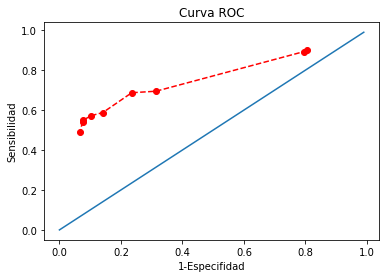

In [690]:
plt.plot(especifities, sensitivities, marker="o", linestyle="--", color="r")
x = [i*0.01 for i in range(100)]
y = [i*0.01 for i in range(100)]
plt.plot(x, y)
plt.xlabel("1-Especifidad")
plt.ylabel("Sensibilidad")
plt.title("Curva ROC")

In [691]:
from sklearn import metrics

In [692]:
espc_1, sensit, _ = metrics.roc_curve(y_test, prob)

In [693]:
df = pd.DataFrame(
    {
        "x": espc_1,
        "y": sensit
    }
)

In [694]:
df.head()

,x,y
0,0.0,0.000000
1,0.0,0.007634
2,0.0,0.015267
3,0.0,0.030534
4,0.0,0.061069


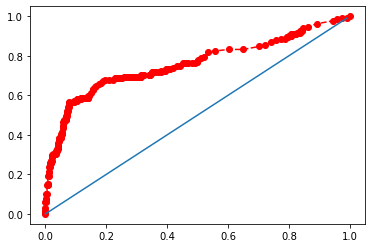

In [695]:
plt.plot(df["x"], df["y"], marker="o", linestyle="--", color="r", )
x = [i*0.01 for i in range(100)]
y = [i*0.01 for i in range(100)]
plt.plot(x, y)

In [696]:
auc = metrics.auc(espc_1, sensit)
auc

0.7601015508963421

No está nada mal un área de 0.76.

# Resumen final

<img src="img/img_992.png" width="750"/>